In [2]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import keras
import tensorflow
from PIL import Image
import torch.nn.functional as F
import torch.nn as nn
from torch.optim import Adam

In [17]:
train_dir = '.\\train'
test_dir = '.\\test'

In [18]:
labels = ['Гароу', 'Генос', 'Сайтама', 'Соник', 'Татсумаки', 'Фубуки']

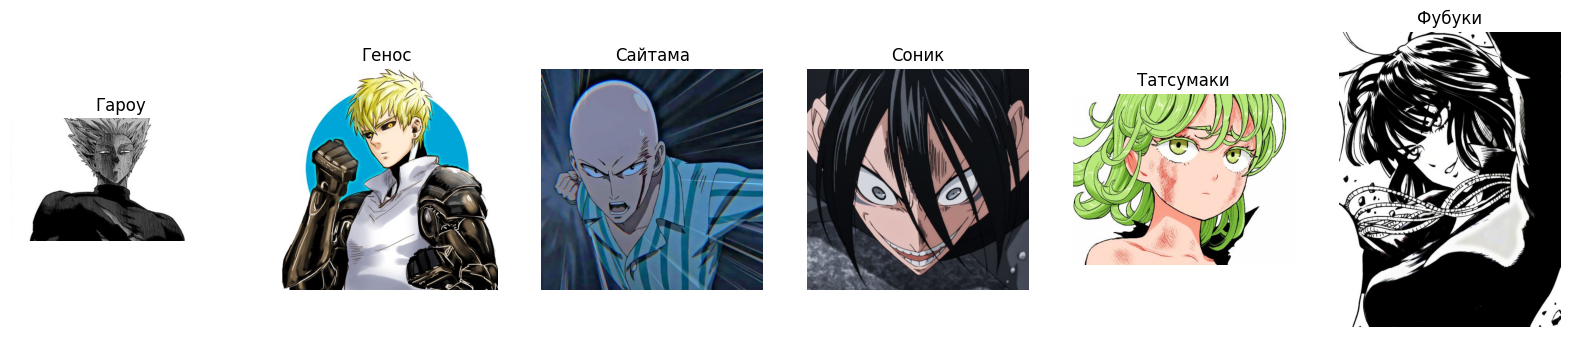

In [19]:
def show_images(dataset, labels):
    fig, axes = plt.subplots(1, len(labels), figsize=(20, 5))
    for i, cls in enumerate(labels):
        cls_path = os.path.join(train_dir, cls)
        img_path = os.path.join(cls_path, os.listdir(cls_path)[0])
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].set_title(cls)
        axes[i].axis('off')
    plt.show()
show_images(train_dir, labels)

In [20]:
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in labels}

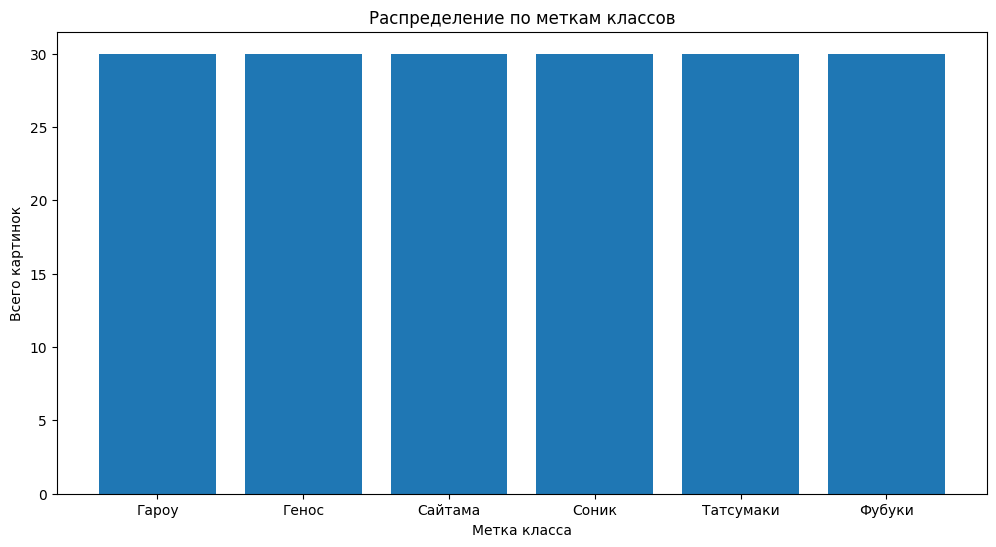

In [21]:
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Метка класса')
plt.ylabel('Всего картинок')
plt.title('Распределение по меткам классов')
plt.show()

In [22]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [23]:
class AnimeDataset(Dataset):
    def __init__(self, dir, transform=None):
        self.dir = dir
        self.transform = transform
        self.imgs = []
        self.labels = []
        cls_dir = os.path.join(test_dir, labels[0])
        if os.path.exists(cls_dir):
            for idx, clas in enumerate(labels):
                cls_dir = os.path.join(self.dir, clas)
                for img_name in os.listdir(cls_dir):
                    self.imgs.append(os.path.join(cls_dir, img_name))
                    self.labels.append(idx)
        else:
            for img_name in os.listdir(self.dir):
                self.imgs.append(self.dir)
    
    def __len__(self):
        return len(self.imgs)
    
    def __getitem__(self, idx):
        img_path = self.imgs[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

In [24]:
train_dataset = AnimeDataset(train_dir, transform=transform)
# test_dataset = AnimeDataset(test_dir, transform=transform)

In [25]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [26]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.c1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.c2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, len(labels))
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.c1(x))
        x = self.pool(x)
        x = self.relu(self.c2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * 32 * 32)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [27]:
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimize = Adam(model.parameters(), lr=0.001)

In [28]:
num_epochs = 10
for ep in range(num_epochs):
    model.train()
    loss = 0
    for img, label in train_loader:
        optimize.zero_grad()
        out = model(img)
        losses = criterion(out, label)
        losses.backward()
        optimize.step()
        loss += losses.item()
    print(f"Эпоха: {ep+1}, Потери: {loss/len(train_loader):.5f}")

PermissionError: [Errno 13] Permission denied: '.\\train'

In [14]:
# train_data = pd.read_csv('train.csv')
# submission_data = pd.read_csv('submission.csv')
# train_data = train_data.drop(columns=["id"])
# submission_data = submission_data.drop(columns=["id"])

# img_name = train_data.iloc[0, 0]
# label = train_data.iloc[0, 1:]

In [15]:
# train_data

,path,class
0,train/Гароу/02b8c85727aa4d9978ae2cb518affb2a.jpg,Гароу
1,train/Гароу/07ab564da08a1579acecfd41d4b5859c.jpg,Гароу
2,train/Гароу/0e5b6f7f9e2afd75ef5d3269d8e618b3.jpg,Гароу
3,train/Гароу/0e90e4a1421b55d8714cf49fc35f6282.jpg,Гароу
4,train/Гароу/1a889943f42991fb690023b96874d47e.jpg,Гароу
...,...,...
175,train/Фубуки/7be42b5a5fb6ace5b5fcd2d6c4fbf589.jpg,Фубуки
176,train/Фубуки/7f1039857b631251b7913032e1e24506.jpg,Фубуки
177,train/Фубуки/7f9247c62f856a2d5cef6133b04c476f.jpg,Фубуки
178,train/Фубуки/9c95445acc9ba746ddd3436ce2982811.jpg,Фубуки


TypeError: Image data of dtype <U48 cannot be converted to float

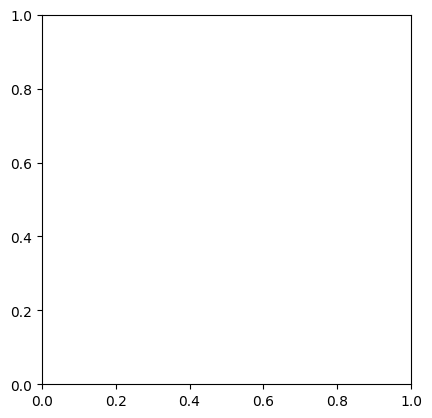

In [6]:
def show_landmarks(image, data):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(data[:, 0], data[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  # pause a bit so that plots are updated

plt.figure()
show_landmarks(img_name, train_data)
plt.show()